# **Lista de exercícios 3**

## **Métodos implementados**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fixed_point(f, x0, epsilon=1e-5, maxiter=100, a=1, gen_g=False):
  if gen_g:
    g = lambda x : x - a*f(x)
  else:
    g = f
  err = 1
  iter = 0
  x1 = None

  while err > epsilon and iter < maxiter:
    x1 = g(x0)
    err = abs(x1-x0)/abs(x1)
    x0 = x1
    iter += 1

  return x0, err, iter

In [3]:
def newton_raphson(f, df, x0, epsilon=1e-5, maxiter=100):
  err = 1
  iter = 0
  x1 = None

  while err > epsilon and iter < maxiter:
    x1 = x0 - f(x0)/df(x0)
    err = abs(x1-x0)/abs(x1)
    x0 = x1
    iter += 1
    print(f"x_{iter} = {x0}")

  return x0, err, iter

In [4]:
def secant(f, x1, x0, epsilon=1e-5, maxiter=100):
  err = 1
  iter = 0
  x_ant, x = x1, x0

  phi = lambda x1,x0: (x1*f(x0) - x0*f(x1))/(f(x0) - f(x1))

  while err > epsilon and iter < maxiter:
    x_ant, x = x, phi(x_ant, x)
    err = abs(x - x_ant)/abs(x)
    iter += 1

  return x, err, iter

## **1) Use a iteração de ponto fixo simples para localizar a raiz de $f(x) = 2sen(\sqrt{x}) - x$. Use a aproximação inicial $x_0 = 0,5$ e itere até 𝜀𝑎 ≤ 0,001%.**

In [5]:
f1 = lambda x: 2*np.sin(np.sqrt(x)) - x

# isolando x de f(x) para obter g(x)
g1 = lambda x: 2*np.sin(np.sqrt(x))

In [6]:
ans = fixed_point(g1, 0.5, 0.00001)
ans

(1.9723804860817313, 1.9418688091098392e-06, 8)

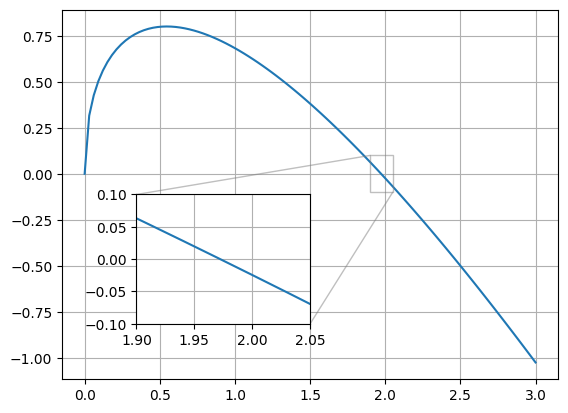

In [7]:
x = np.linspace(0, 3, 100)

fig, ax = plt.subplots()
ax.plot(x, f1(x))
ax.grid()

axin = ax.inset_axes([0.15, 0.15, 0.35, 0.35])
axin.plot(x, f1(x))
axin.grid()
axin.set_xlim([1.9, 2.05])
axin.set_ylim([-0.1, 0.1])

ax.indicate_inset_zoom(axin);

## **2) Determine a maior raiz real de $f(x) = 2x^{3} - 11,7x^{2} + 17,7x - 5$:**

### (a) Graficamente

In [8]:
f2 = lambda x: 2*x**3 - 11.7*x**2 + 17.7*x - 5

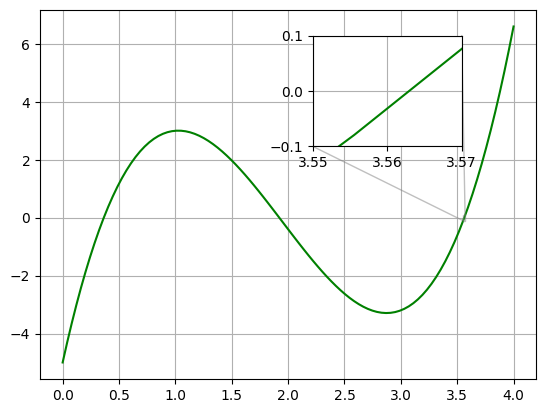

In [12]:
x = np.linspace(0, 4, 100)
fig, ax = plt.subplots()
ax.plot(x, f2(x), 'g')
ax.grid()

axin = ax.inset_axes([0.55, 0.63, 0.3, 0.3])
axin.plot(x, f2(x), 'g')
axin.grid()
axin.set_xlim([3.55, 3.57])
axin.set_ylim([-0.1, 0.1])

ax.indicate_inset_zoom(axin);

### (b) Pelo método da iteração de ponto fixo (três iterações, $x_0 = 3$). Observação: certifique-se de desenvolver uma solução que convirja para a raiz.

In [13]:
# isolando o x^1 da funcao f2(x) para obter g(x)
g2 = lambda x: (5 - 2*x**3 + 11.7*x**2) / 17.7

In [14]:
ans = fixed_point(g2, 3)
ans

(3.563141073769594, 8.0804902393884e-06, 13)

### (c) Pelo método de Newton-Raphson (três iterações, $x_0 = 3$).

In [15]:
# derivada da funcao f2(x)
df2_dx = lambda x: 6*x**2 - 11.7*2*x + 17.7

In [16]:
ans = newton_raphson(f2, df2_dx, 3)
ans

x_1 = 5.13333333333332
x_2 = 4.26975005653324
x_3 = 3.7929344806432264
x_4 = 3.5998192883980815
x_5 = 3.56433803284734
x_6 = 3.5631621003251914
x_7 = 3.5631608248635556


(3.5631608248635556, 3.5795791954248715e-07, 7)

### (d) Pelo método da secante (três iterações, $x_{-1} = 3$, $x_0 = 4$).

In [17]:
ans = secant(f2, 3, 4)
ans

(3.5631608248597932, 1.8025510624709753e-08, 7)

## **3) Use o método de Newton-Raphson para determinar uma raiz real de $f(x) = -1 + 5,5x - 4x^{2} + 0,5x^{3}$ usando aproximações iniciais:**

### (a) 4,52

In [18]:
f3 = lambda x: -1 + 5.5*x - 4*x**2 + 0.5*x**3

# derivada da funcao f3(x)
df3_dx = lambda x: 5.5 - 8*x + 1.5*x**2

In [19]:
ans = newton_raphson(f3, df3_dx, 4.52)
ans

x_1 = -807.2088888887776
x_2 = -537.2532003712208
x_3 = -357.2841523281942
x_4 = -237.3068983860304
x_5 = -157.32521824582312
x_6 = -104.00880649610153
x_7 = -68.47153758740427
x_8 = -44.790406004104675
x_9 = -29.01827254496241
x_10 = -18.525819316553623
x_11 = -11.562926539723993
x_12 = -6.96615643223604
x_13 = -3.963269232556876
x_14 = -2.0419346283761106
x_15 = -0.8612341545958171
x_16 = -0.19297931039012484
x_17 = 0.11885708870732592
x_18 = 0.20680569644687175
x_19 = 0.21427957027259015
x_20 = 0.21433298607881082
x_21 = 0.21433298880199797


(0.21433298880199797, 1.2705403695542486e-08, 21)

### (b) 4,54

In [20]:
ans = newton_raphson(f3, df3_dx, 4.54)
ans

x_1 = 124.5406981519502
x_2 = 83.93510468703067
x_3 = 56.87443067596445
x_4 = 38.84878974656964
x_5 = 26.85441860393113
x_6 = 18.893404114015794
x_7 = 13.64146792207766
x_8 = 10.22877188982599
x_9 = 8.096892499082177
x_10 = 6.901198364242262
x_11 = 6.404630408915099
x_12 = 6.309328168803438
x_13 = 6.305901891682982
x_14 = 6.305897529340497


(6.305897529340497, 6.917877217584039e-07, 14)

### Discuta e use métodos gráficos e analíticos para explicar quaisquer peculiaridades nos resultados.

Com estimativas iniciais, o método de Newton-Raphson acabou encontrando raízes diferentes utilizando cada estimativa.

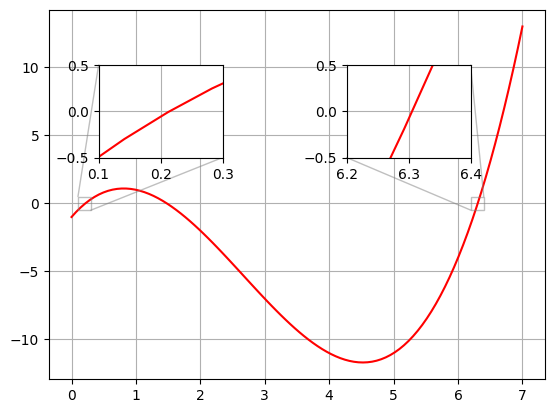

In [22]:
x = np.linspace(0, 7, 100)

fig, ax = plt.subplots()
ax.plot(x, f3(x), 'r')
ax.grid()

# primeira raiz
axin1 = ax.inset_axes([0.1,0.6,0.25,0.25])
axin1.plot(x, f3(x), 'r')
axin1.set_xlim([0.1, 0.3])
axin1.set_ylim([-0.5,0.5])
axin1.set_xticks([0.1,0.2,0.3])
axin1.grid()

# segunda raiz
axin2 = ax.inset_axes([0.6,0.6,0.25,0.25])
axin2.plot(x, f3(x), 'r')
axin2.set_xlim([6.2, 6.4])
axin2.set_ylim([-0.5,0.5])
axin2.set_xticks([6.2,6.3,6.4])
axin2.grid()

ax.indicate_inset_zoom(axin1)
ax.indicate_inset_zoom(axin2);

In [23]:
print(df3_dx(4.52))
print(df3_dx(4.54))

-0.014400000000001967
0.09740000000000038


## **4) Determine a menor raiz real de $f(x) = -12 - 21x + 18x^{2} - 2,4x^{3}$:**

### (a) graficamente

In [24]:
f4 = lambda x: -12 - 21*x + 18*x**2 - 2.4*x**3

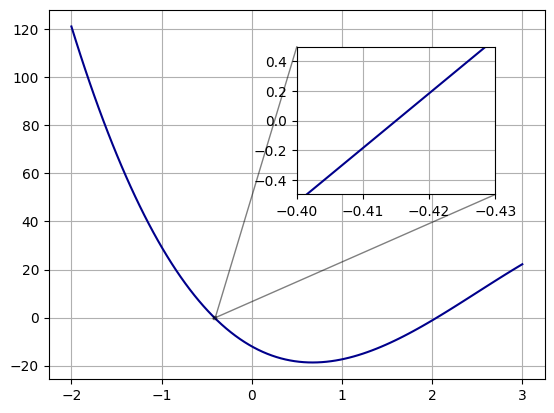

In [27]:
x = np.linspace(-2, 3, 100)
fig, ax = plt.subplots()
ax.plot(x, f4(x), 'darkblue')
ax.grid()

axin = ax.inset_axes([0.5, 0.50, 0.4, 0.4])
axin.plot(x,f4(x), 'darkblue')
axin.set_xlim([-0.4, -0.43])
axin.set_ylim([-.5, .5])
axin.grid()
ax.indicate_inset_zoom(axin, edgecolor="black");

### (b) usando o método da secante para um valor de 𝜀𝑠 correspondente a três algarismos significativos.

In [28]:
ans = secant(f4, -1, 0 , 1e-3)
ans

(-0.41536080895425237, 0.00014895614853124866, 5)

## **5) Localize a primeira raiz positiva de $f(x) = sen(x) + cos(1+x^{2}) - 1$ em que x está em radianos. Use quatro iterações do método da secante com aproximações iniciais:**

In [29]:
f5 = lambda x: np.sin(x) + np.cos(1 + x**2) - 1

### (a) $x_{i-1} = 1,0$ e $x_i = 3,0$;

In [30]:
ans = secant(f5, 1, 3, maxiter=4)
ans

(0.39636577372668536, 0.4097592884897722, 4)

### (b) $x_{i-1} = 1,5$ e $x_i = 2,5$;

In [31]:
ans = secant(f5, 1.5, 2.5, maxiter=4)
ans

(2.532106931631685, 0.0022778829663743097, 4)

### (c) $x_{i-1} = 1,5$ e $x_i = 2,25$;

In [32]:
ans = secant(f5, 1.5, 2.25, maxiter=4)
ans

(1.9446084255699538, 2.04032217900133e-06, 4)

### Use o método gráfico para explicar seus resultados.

Com as estimativas dadas no item _(a)_, o valor de x que foi resultado não convergiu, pois ao analisar o gráfico vemos que o valor de _f(x)_ nesse ponto não é zero. Já para os itens _(b)_ e _(c)_ temos que ao utilizar estimativas diferentes isso acabou resultado em que cada uma convergiu para uma raiz diferente da função

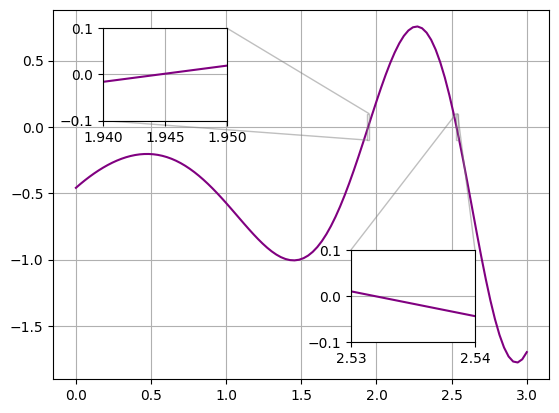

In [34]:
x = np.linspace(0, 3, 100)

fig, ax = plt.subplots()
ax.plot(x, f5(x), 'purple')
ax.grid()

# primeira raiz
axin1 = ax.inset_axes([0.1, 0.7, 0.25, 0.25])
axin1.plot(x,f5(x), 'purple')
axin1.set_xlim([1.94, 1.95])
axin1.set_ylim([-0.1,0.1])
axin1.grid()

# segunda raiz
axin2 = ax.inset_axes([0.6, 0.1, 0.25, 0.25])
axin2.plot(x,f5(x), 'purple')
axin2.set_xlim([2.53, 2.54])
axin2.set_ylim([-0.1,0.1])
axin2.grid()

ax.indicate_inset_zoom(axin1);
ax.indicate_inset_zoom(axin2);

## **6) Determine a raiz real de $x^{3,5} = 80$, com o método da secante até 𝜀𝑠 = 0,1%. Use uma aproximação inicial $x_{i-1} = 3,0$ e $x_i = 3,5$.**

In [35]:
f6 = lambda x: x**7 - 6400

In [36]:
ans = secant(f6, 3, 3.5, 0.001)
ans

(3.497354180123668, 0.0003856612199094109, 2)